In [2]:
# import itertools
import statistics
import math

def segments_intersect(x1, y1, x2, y2, x3, y3, x4, y4):
    """
    Determine if two line segments intersect, given their endpoints (x1, y1), (x2, y2) and (x3, y3), (x4, y4).
    """
    # calculate the direction vectors for each segment
    dx1 = x2 - x1
    dy1 = y2 - y1
    dx2 = x4 - x3
    dy2 = y4 - y3

    # calculate the determinant
    det = dx1*dy2 - dx2*dy1

    # check if the determinant is zero
    if det == 0:
        return False

    # calculate the inverse determinant
    inv_det = 1 / det

    # calculate the difference vectors for each segment
    dx3 = x1 - x3
    dy3 = y1 - y3

    # calculate the parameters of the intersection point
    t1 = (dx2*dy3 - dx3*dy2) * inv_det
    t2 = (dx1*dy3 - dx3*dy1) * inv_det

    # check if the intersection point lies within both segments
    if 0 < t1 < 1 and 0 < t2 < 1:
        return True
    else:
        return False


def count_edge_crossings(G):
    """
    Count the number of edge crossings on each edge in G
    """

    crossings = {}

    for edge in G.edges():
        crossings[edge] = 0
        for other_edge in G.edges():
            if edge[0]!=other_edge[0] and edge[0]!=other_edge[1] and edge[1]!=other_edge[0] and edge[1]!=other_edge[1]:
                if segments_intersect(*pos[edge[0]], *pos[edge[1]], *pos[other_edge[0]], *pos[other_edge[1]]):
                    crossings[edge] += parallel_links


    return crossings


In [3]:
import networkx as nx
# from networkx.readwrite import graphml

num_chips = 16
# calculate crossings with only 2 waveguides per line (to and back)
# so that the baseline bw-per-gpu is 16(WDM)*4GBps*15(TRx groups per GPU)=960GBps
# baseline_BW=960 #GBps
parallel_links = 2
# Create graph
G = nx.complete_graph(num_chips)
labels = {i: str(i) for i in range(num_chips)}
nx.set_node_attributes(G, labels, 'label')

Average value: 43.53333333333333
Maximum value: 96
Minimum value: 0
Standard deviation: 29.07854715700055


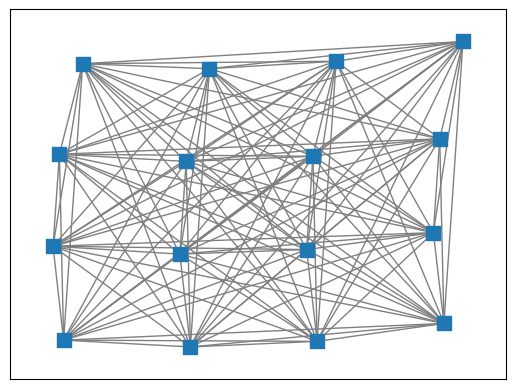

In [4]:
subset_dict = {}
for i in range(num_chips):
    subset_dict[i] = i // math.sqrt(num_chips)

# Add the subset information to the graph
nx.set_node_attributes(G, subset_dict, 'subset')

pos = nx.multipartite_layout(G)
shift = 0.1  # set the shift amount for the x-axis
for n in pos:
    pos[n][0] += (pos[n][1])*(pos[n][1]+0.5) * shift
    pos[n][1] += (pos[n][0])*(pos[n][0]+0.5) * shift
nx.draw_networkx(G, pos=pos, with_labels=False, node_size=100, alpha=1.0, edge_color='gray',node_shape='s' )
crossings = count_edge_crossings(G)
values = list(crossings.values())

average = sum(values) / len(values)
maximum = max(values)
minimum = min(values)
standard_deviation = statistics.stdev(values)

print("Average value:", average)
print("Maximum value:", maximum)
print("Minimum value:", minimum)
print("Standard deviation:", standard_deviation)

In [5]:
import csv

data = [
    ['N', 'Theta[GBps]', 'ave_crossing_per_wg'],
    [16, 960, average],
    [16, 960*2, average*2],
    [16, 960*3, average*3],
    [16, 960*4, average*4]
]

# Specify the file name
file_name = 'straight_crossing.csv'

# Write data to CSV file
with open(file_name, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

